In [28]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
from qiskit_aer import Aer, AerSimulator 
import numpy as np 
import matplotlib.pyplot as plt 

In [29]:
s = '111'
n = len(s)

In [30]:
cbv = QuantumCircuit(n+1, n)
cbv.h(range(0, n+1))
cbv.z(n)
cbv.barrier()

s = s[::-1]
for i in range(0, len(s)):
    if s[i] == '1':
        cbv.cx(i, n)
cbv.barrier()
cbv.h(range(0, n))
cbv.measure(range(0,n), range(0,n))
cbv.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

In [31]:
simulator = AerSimulator()

compiled_circuit = transpile(cbv, simulator)

results = simulator.run(compiled_circuit, shot = 1).result()
count = results.get_counts()

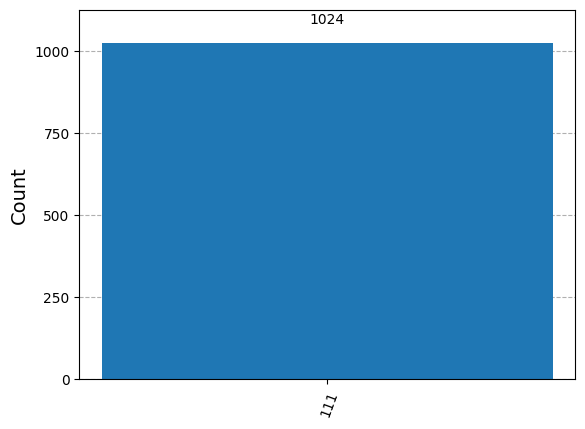

In [32]:
plot_histogram(count)